In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
from PIL import Image
import os as os
import pandas as pd
import pylab as pl

In [30]:

def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [52]:
img_dir = os.path.join(os.getcwd(), "./images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [53]:
X = pd.DataFrame([im.histogram() for im in images])

In [54]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)







PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

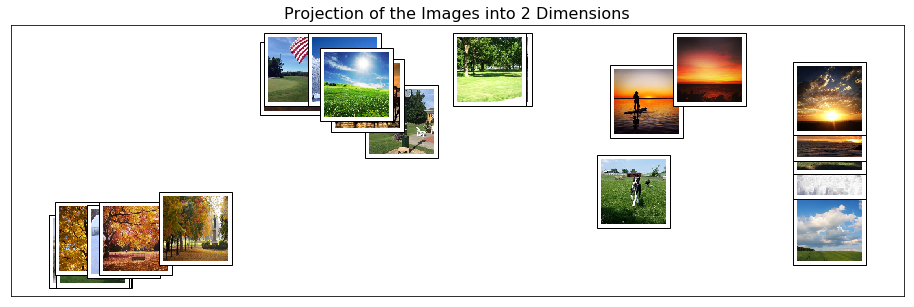

In [36]:
plot_image_space(images, X)

Now, for the second part of the assignment, I repeat the PCA reduction process with a new set of images that I have curated using UFC fighters as models. The fighters are black, brazillian, and white. There were some cases were two fighters were both black or of mixed race -- be it black fighter vs white fighter or white fighter vs brazillian fighter.  I wanted to see if the histogram would distinguish amongst skin color if that were the biggest variation in the photos themselves. Each photo backgrounds an octogon, and all the different races were actually appropiately categorized. It is a similar idea of "how many photos are predominately blue". The background is more or less black and has those corresponding values. So I wanted to see if it would pick up on clusters of colors similar to each other (ie, the white fighters are farther away from the black fighters). PCA separated and grouped images well based on the RGB values that corresponded to fighter's skin color.

In [87]:
img_dir = os.path.join(os.getcwd(), "./ufc_images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [88]:
X = pd.DataFrame([im.histogram() for im in images])

In [89]:
X

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,260,1680,699,878,563,341,293,313,236,258,...,1,1,0,1,2,2,1,0,1,0
1,500,526,472,353,331,295,240,267,224,251,...,3,5,3,1,3,11,3,5,1,10
2,30,75,201,373,410,324,250,201,227,240,...,3,1,4,3,1,3,3,3,0,2
3,97,407,295,162,204,200,249,388,283,272,...,5,3,4,1,2,2,0,0,1,15
4,2,6,11,22,59,118,276,478,222,158,...,0,1,1,2,0,0,0,1,1,1
5,77,734,574,244,198,166,176,219,187,132,...,1,1,3,1,0,0,0,2,2,4
6,592,92,52,58,55,34,57,79,75,136,...,0,4,1,0,0,0,1,5,4,39
7,5,1,2,5,6,10,3,15,112,237,...,8,5,6,0,3,11,6,9,2,20
8,1692,560,342,236,207,194,147,126,118,68,...,1,0,0,0,0,0,0,0,0,2
9,93,72,118,417,349,189,177,172,195,178,...,0,1,2,1,0,3,0,0,1,0


In [90]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)





PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

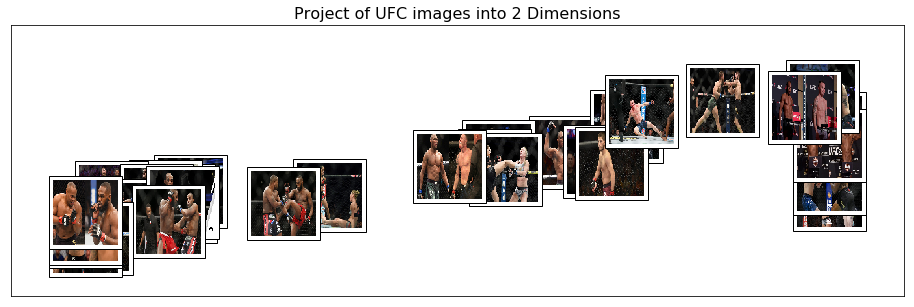

In [94]:
plot_image_space(images, X, title = "Project of UFC images into 2 Dimensions")

Solutions to Part 2: 

For two images to be farther apart means that they are more dissimilar to each other. For example, pixel groups that correspond to orange, and within that first data set, are clustered together in one bin of the portrayed histogram. The same goes for blue, green, red, and so forth. For images to be far apart indicate difference-- the clusters of pixel that are similar to in some images are different than those in the other image. A good example are the fall images relative to the images of the white sky. 






